In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
883,5fac06768d07f6f3e2d84ab2,2020-11-11 16:42:46.482,2020-11-11 15:42:46.481,NQZ0,SELL,2.0,11779.375000,"[0000e1a7.5fabddfd.01.01, 0000e1a7.5fabddff.01...",102,1881896410,STOP-LOSS,4.20,-1323.40
884,5fac15888d07f6f3e2d84ae3,2020-11-11 17:47:04.265,2020-11-11 16:47:04.138,MNQZ0,BUY,2.0,11846.875000,"[0000e1a7.5fabf465.01.01, 0000e1a7.5fabf476.01...",104,1881896417,ENTRY,0.94,0.00
885,5fac158e8d07f6f3e2d84ae4,2020-11-11 17:47:10.774,2020-11-11 16:47:10.772,NQZ0,BUY,2.0,11850.750000,[0000e1a7.5fabf481.01.01],103,1881896413,ENTRY,4.20,0.00
886,5fac3e2d8d07f6f3e2d84b75,2020-11-11 20:40:29.998,2020-11-11 19:40:29.997,NQZ0,SELL,2.0,11843.250000,"[0000e1a7.5fac1e2a.01.01, 0000e1a7.5fac1e2b.01...",106,1881896419,STOP-LOSS,4.20,-308.40
887,5fac3e2e8d07f6f3e2d84b76,2020-11-11 20:40:30.097,2020-11-11 19:40:30.097,MNQZ0,SELL,2.0,11849.000000,[0000e1a7.5fac1e2e.01.01],105,1881896418,STOP-LOSS,0.94,6.62
888,5fac4ea08d07f6f3e2d84baf,2020-11-11 21:50:40.740,2020-11-11 20:50:40.737,NQZ0,BUY,2.0,11895.125000,"[0000e1a7.5fac3393.01.01, 0000e1a7.5fac3394.01...",107,1881896424,ENTRY,4.20,0.00
889,5fac4ea18d07f6f3e2d84bb0,2020-11-11 21:50:41.863,2020-11-11 20:50:41.853,MNQZ0,BUY,7.0,11888.714286,"[0000e1a7.5fac3384.01.01, 0000e1a7.5fac3387.01...",108,1881896427,ENTRY,3.29,0.00
890,5fac808a8d07f6f3e2d84c59,2020-11-12 01:23:38.789,2020-11-12 00:23:38.740,MNQZ0,SELL,7.0,11876.071429,"[0000e1a7.5fac6f73.01.01, 0000e1a7.5fac6f74.01...",110,1881896429,STOP-LOSS,3.29,-183.58
891,5fac885b8d07f6f3e2d84c72,2020-11-12 01:56:59.434,2020-11-12 00:56:59.432,NQZ0,SELL,2.0,11870.125000,"[0000e1a7.5fac70ef.01.01, 0000e1a7.5fac70f0.01...",109,1881896428,STOP-LOSS,4.20,-1008.40
892,5fad05aa8d07f6f3e2d84e23,2020-11-12 10:51:38.253,2020-11-12 09:51:38.125,MNQZ0,BUY,3.0,11933.666667,"[0000e1a7.5faca148.01.01, 0000e1a7.5faca149.01...",114,1003276120,ENTRY,1.41,0.00


In [3]:
df.head()

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
0,5f0f0525bd2ee6b18fd4eeb2,2020-07-15 15:31:17.017,2020-07-15 13:31:17.007,MYM SEP 20,SELL,6.0,26855.00,[0000e1a7.5f0f086b.01.01],1248,779987153,STOP-LOSS,2.82,1416.36
1,5f0f0525bd2ee6b18fd4eeb3,2020-07-15 15:31:17.560,2020-07-15 13:31:17.559,YM SEP 20,SELL,1.0,26855.00,[0000e1a7.5f0f086d.01.01],1247,779987152,STOP-LOSS,2.10,2370.80
2,5f0f1613f81f3181af388633,2020-07-15 16:43:31.133,2020-07-15 14:43:31.088,NQU0,BUY,1.0,10749.00,[0000e1a7.5f0f3a1f.01.01],1265,165612016,ENTRY,2.10,0.00
3,5f0f1613f81f3181af388634,2020-07-15 16:43:31.139,2020-07-15 14:43:31.133,MNQU0,BUY,1.0,10748.75,[0000e1a7.5f0f3a20.01.01],1266,165612017,ENTRY,0.47,0.00
4,5f0f1923f81f3181af38863d,2020-07-15 16:56:35.084,2020-07-15 14:56:35.083,MNQU0,SELL,1.0,10717.50,[0000e1a7.5f0f3fa0.01.01],1268,165612019,STOP-LOSS,0.47,-63.44


In [4]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.1,0.0
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.1,10.8
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.1,0.0
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.1,-169.2


In [5]:
df = df[df['sys_time'] > '20201008']

In [6]:
df.count()

_id            474
sys_time       474
time           474
contract       474
action         474
amount         474
price          474
exec_ids       474
order_id       474
perm_id        474
reason         474
commission     474
realizedPNL    474
dtype: int64

In [7]:
df[df.realizedPNL>0].realizedPNL.count()

85

In [8]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [9]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-11-12 18:36:20.724,2020-11-12 19:36:20.725,NQ,BUY,2.0,11830.250,120,STOP-LOSS,4.20,-808.4,129447.80001
2020-11-12 19:48:40.672,2020-11-12 20:48:40.682,NQ,SELL,2.0,11792.625,122,ENTRY,4.20,0.0,129447.80001
2020-11-12 19:48:42.073,2020-11-12 20:48:42.163,NQ,SELL,0.5,11799.450,123,ENTRY,2.35,0.0,129447.80001
2020-11-12 20:16:24.622,2020-11-12 21:16:24.698,NQ,BUY,0.5,11818.500,125,STOP-LOSS,2.35,-195.2,129252.60001
2020-11-12 20:16:24.696,2020-11-12 21:16:24.699,NQ,BUY,2.0,11819.000,124,STOP-LOSS,4.20,-1063.4,128189.20001


In [10]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [11]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [12]:
df.groupby('contract').realizedPNL.sum()

contract
ES    5719.000000
GC     442.240000
NQ    6896.400011
YM    5737.559999
Name: realizedPNL, dtype: float64

In [13]:
df.realizedPNL.sum()

18795.20001

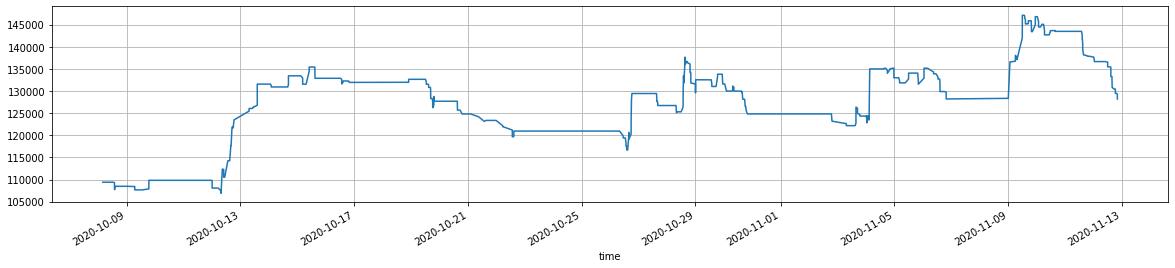

In [14]:
df.cash.plot(figsize=(20,4), grid=True);

In [15]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [16]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     30
 GC     60
 NQ    312
 YM     72
 Name: action, dtype: int64,
 474)

In [17]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES     1.153846
 GC     2.307692
 NQ    12.000000
 YM     2.769231
 Name: action, dtype: float64,
 18.23076923076923)

In [18]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES      90.93
GC     168.76
NQ    1027.82
YM     192.83
Name: commission, dtype: float64

In [19]:
df.commission.sum()

1480.3400000000001

In [20]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.36,-26.08,1033.42,-631.50,1.64,-32.13,195.0
YM,0.38,158.69,1594.87,-715.51,2.23,162.43,36.6
GC,0.30,11.30,1356.78,-565.33,2.40,11.30,26.2
ES,0.38,631.74,3155.79,-882.69,3.58,651.93,10.5
total,0.36,51.91,1309.95,-651.60,2.01,54.56,268.3


In [21]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [22]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.040280,0.256243,0.386495,0.504748
GC,-0.040280,1.000000,-0.141347,0.076120,0.093240
NQ,0.256243,-0.141347,1.000000,0.332363,0.888167
YM,0.386495,0.076120,0.332363,1.000000,0.658231
total,0.504748,0.093240,0.888167,0.658231,1.000000


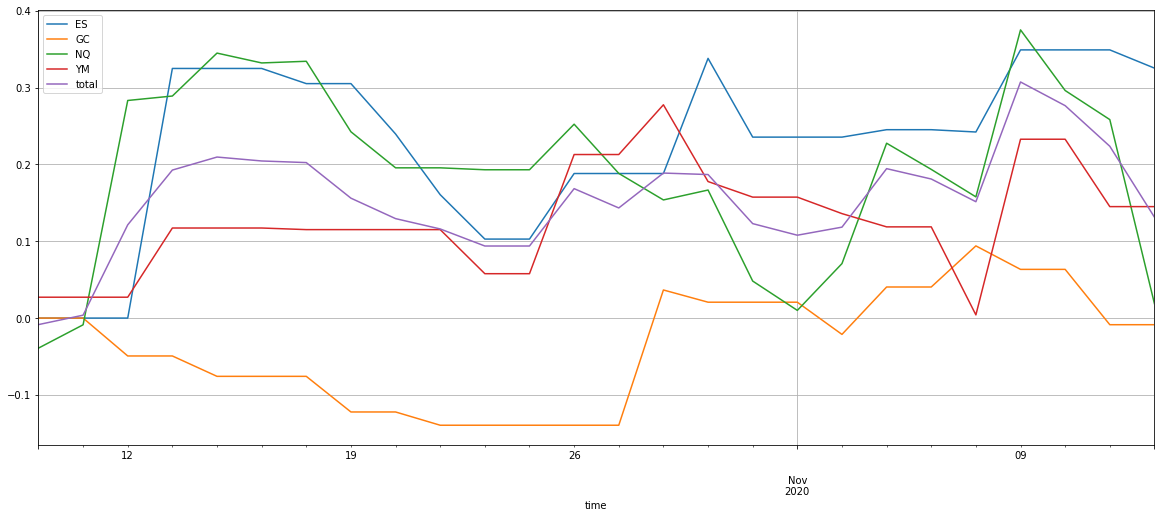

In [23]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

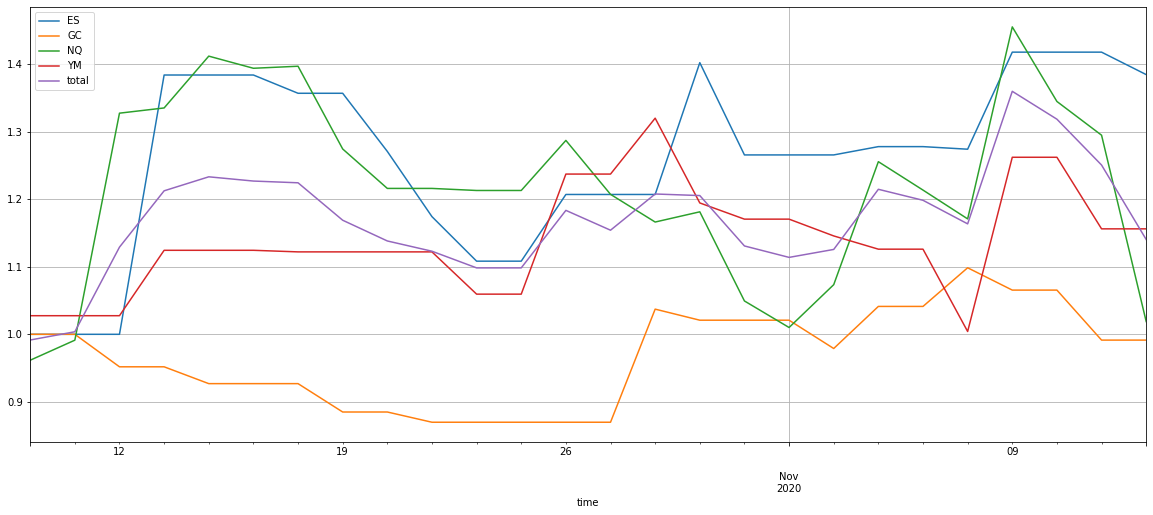

In [24]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [25]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,22.418351,-0.080172,0.198877,3.080578,2.571508
Cumulative returns,0.384533,-0.008585,0.018891,0.156141,0.140355
Annual volatility,1.458220,0.758901,1.736346,1.182168,0.919520
Sharpe ratio,2.779845,0.229469,0.879751,1.720052,1.811004
Calmar ratio,112.562673,-0.615827,0.663328,12.875054,15.935667
Stability,0.265978,0.275777,0.002165,0.221149,0.226286
Max drawdown,-0.199163,-0.130185,-0.299816,-0.239267,-0.161368
Omega ratio,2.233753,1.061290,1.190564,1.519838,1.391698
Sortino ratio,8.514651,0.490299,1.680788,3.647210,3.731356
Skew,2.676331,2.530160,1.266571,1.634676,1.109772


In [26]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-10-31,26.56,2.09,4.94,17.05,13.08
2020-11-30,9.40,-2.89,-2.90,-1.23,0.84


In [27]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       38.0
GC       -1.0
NQ        2.0
YM       16.0
total    14.0
dtype: float64

In [28]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
2020-11-09 12:00:55.681,YM,SELL,29465.000000,4885.8
2020-10-13 14:11:33.923,ES,SELL,3508.250000,4770.8
...,...,...,...,...
2020-10-29 23:07:31.042,NQ,BUY,11232.000000,-2003.4
2020-10-29 00:09:52.931,YM,BUY,26615.000000,-2028.4
2020-11-05 20:17:09.669,NQ,SELL,12058.500000,-2038.4


In [29]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
2020-10-13,0.383923,0.000000,0.005817,0.094245,0.073878
2020-10-28,0.000000,0.192513,-0.033958,0.066886,0.046454
2020-10-14,0.000000,-0.026177,0.057465,0.000000,0.017096
2020-10-09,0.000000,0.000000,0.030839,0.000000,0.012336
2020-11-03,0.000000,-0.041049,0.062782,-0.021236,0.010568
